In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset_1_path = './data/amazon_cells_labelled.txt'
dataset_2_path = './data/imdb_labelled.txt'
dataset_3_path = './data/yelp_labelled.txt'

## About the data

- Format: `sentence \t score \n`
- Key: Score is either 1 (for positive) or 0 (for negative)

## Assignment

- Perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative
- Pick one of the company data files and build your own classifier. 
- When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

In [3]:
data_raw = pd.read_csv(dataset_1_path, delimiter="\t", header=None)
data_raw.columns = ['text', 'sentiment']
data_raw.head(3)

,text,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1


In [4]:
keywords = ["great", "good", "must have", "recommended", "love", "awesome", "best", "excellent", "highly", "impressed"]

for key in keywords:
    data_raw[key] = (data_raw.text.str.contains(key, case=False)).astype(int)

data_raw.head(3)

,text,sentiment,great,good,must have,recommended,love,awesome,best,excellent,highly,impressed
0,So there is no way for me to plug it in here i...,0,0,0,0,0,0,0,0,0,0,0
1,"Good case, Excellent value.",1,0,1,0,0,0,0,0,1,0,0
2,Great for the jawbone.,1,1,0,0,0,0,0,0,0,0,0


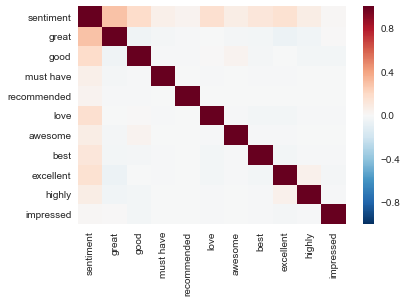

In [5]:
sns.heatmap(data_raw.corr())

In [6]:
data = data_raw[keywords]
target = data_raw["sentiment"]

In [7]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB() #initiate the model
bnb.fit(data, target) # fit the model

#classify
y_pred = bnb.predict(data)
data_raw["prediction"] = y_pred

#results
print("Out of {} records we mislabeled: {}".format( data.shape[0], (target != y_pred).sum() ))

Out of 1000 records we mislabeled: 295


In [8]:
data_raw[data_raw["prediction"] != data_raw["sentiment"]]
# Question: Why does row 11 not get predicted as a positive sentiment? We see the 1 there.
# Question: What process do you use to get a greater accuracy? We're still off 29% of the time!!

,text,sentiment,great,good,must have,recommended,love,awesome,best,excellent,highly,impressed,prediction
11,He was very impressed when going from the orig...,1,0,0,0,0,0,0,0,0,0,1,0
23,I have yet to run this new battery below two b...,1,0,0,0,0,0,0,0,0,0,0,0
31,This product is ideal for people like me whose...,1,0,0,0,0,0,0,0,0,0,0,0
36,It has kept up very well.,1,0,0,0,0,0,0,0,0,0,0,0
42,Nice headset priced right.,1,0,0,0,0,0,0,0,0,0,0,0
45,It has all the features I want,1,0,0,0,0,0,0,0,0,0,0,0
48,This case seems well made.,1,0,0,0,0,0,0,0,0,0,0,0
52,A usable keyboard actually turns a PDA into a ...,1,0,0,0,0,0,0,0,0,0,0,0
53,This phone is pretty sturdy and I've never had...,1,0,0,0,0,0,0,0,0,0,0,0
55,Everything about it is fine and reasonable for...,1,0,0,0,0,0,0,0,0,0,0,0


In [59]:
# The real way to do this
sample_positive = data_raw[data_raw["sentiment"] == 1].sample(100)[["text", "sentiment"]]
sample_negative = data_raw[data_raw["sentiment"] == 0].sample(100)[["text", "sentiment"]]

combined_sample = sample_positive.append(sample_negative)

In [63]:
# take individual words
split_combined_sample = combined_sample["text"].str.lower().str.replace("\W+", " ").str.split("\s+")
indicator = split_combined_sample.apply('|'.join).str.get_dummies(sep='|')
indicator["sentiment"] = combined_sample["sentiment"]
indicator

## Next: try different feature ranking methods to see what features we should keep
## Target = indicator["sentiment"]
## Data = indicator



,1,10,100,13,2,2160,3,3o,5,50,...,would,wouldn,wrong,year,years,yet,you,your,z500a,sentiment
340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
583,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
726,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
611,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,1
725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
911,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
